# Projet  Traitement Automatique des Langues

# Spirit, L'etalon des plaines

![SegmentLocal](img/1.jpg "segment")

![SegmentLocal](img/0.jpg "segment")


In [6]:
import os             
folder = "./data"
folders = os.listdir(folder)
#print(folders)

txt_files = []

for i in folders:
    txt_files.append('/'+i)
print(txt_files)

['/Deux Frères Sous Le Soleil.txt', '/Dégage.txt', '/Je Defendrai Ma Vie.txt', '/Je Reviendrai Vers Toi.txt', '/Ma Place Est Ici.txt', '/Me Voilà.txt', '/Rien De Ce Que J’ai Vécu.txt', '/Sonne Le Clairon.txt']


In [7]:
import pandas as pd
corpus = []

for i in txt_files:
    with open(folder+i,encoding='utf8') as f_input:
        corpus.append(f_input.read())

In [9]:
#print(corpus)

![SegmentLocal](img/2.gif "segment")

In [10]:
words_list = []

for phrase in corpus:
    words_list.append((str(phrase)).split())
#print(words_list)

In [11]:
words_corpus = []
for words in words_list:
    for word in words:
        words_corpus.append(word)
#print(words_corpus)

In [12]:
from collections import Counter

word_count = Counter(words_corpus)
a = 0
#print(word_count.most_common())

for i in word_count.most_common():
    a += (i[1])
print(a)
#print(word_count.most_common())

1445


In [13]:
print(len(word_count.most_common()))

496


![SegmentLocal](img/3.gif "segment")

In [14]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

lang = 'french'
count = 5

for i in range(len(corpus)):
    new_string = corpus[i].replace('.', '. ').strip()
    lsa = LsaSummarizer(Stemmer(lang))
    lsa.stop_words = get_stop_words(lang)
    parser = PlaintextParser.from_string(new_string, Tokenizer(lang))
    lsa_summary = lsa(parser.document, count)
    lsa_s = [str(sent) for sent in lsa_summary]
    summary = ' '.join(lsa_s)
    print(txt_files[i][:-4] + " Résumé des paroles")
    print(summary)
    print("")
    print("")
    print("")
    

/Deux Frères Sous Le Soleil Résumé des paroles
J'ai vu en rve - une prairie infinite J'ai vu en rve - un soleil endormi Et dans mon rve - nos ailes d'or se dploient Et un seul esprit - nous unit - toi et moi Ecoute ton coeur - petit enfant du desert Ecoute cette voix - c'est celle de ta terre Ecoute tes rves - moi quand tu t'veilles Moi qui suis ton frere - oui - sous le soleil Nous sommes com' deux frres de sang Nous som' deux coeurs l'unisson A jamais nous serons pareils A deux frres sous le soleil Quand tu entendras - le vent dans le canyon Et quand tu verras - courir les bisons Quand tu te perdras - e serai prs de toi Pour veiller sur mon frre - mon frre sous le soleil Nous sommes com' deux frres de sang Nous som' deux coeurs l'unisson A jamais nous serons pareils A deux frres sous le soleil Sous le soleil, sous le soleil Com' deux frres sous le soleil



/Dégage Résumé des paroles
C'est pas parce qu'on m'a mis des fers Que je vais changer Oui, mais si tu veux tenter ta chance Alor

![SegmentLocal](img/1.gif "segment")

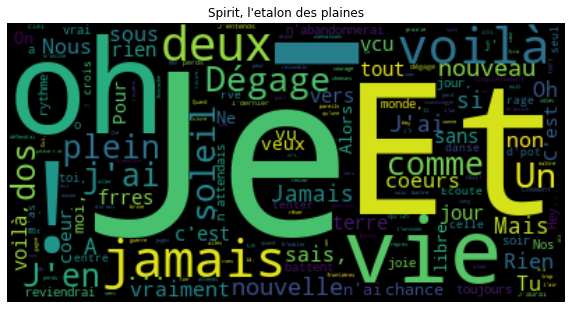

In [20]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt


from nltk.corpus import stopwords

french_stopwords = stopwords.words('french')
final_corpus = []
for i in words_corpus:
    if i not in french_stopwords:
        final_corpus.append(i)

#print(final_corpus)
wordcloud = WordCloud().generate_from_frequencies(Counter(final_corpus))


# Display the generated image:
plt.figure(figsize=(10,10))
plt.title("Spirit, l'etalon des plaines")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()